<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab06_ec_variable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ecuaciones de una variable:

Para los siguiente problemas:


1.0 ¿Para que ángulo el area del segmento circular es igual a un cuarto del area de la circunferencia?

- Muestre que la expresión que permite resolver el problema:


\begin{equation}
\theta - \sin \theta = \frac{\pi}{2}
\end{equation}


- ¿Construya una grafica para theta?,  Alrededor de que punto esta solución.(Para este punto se recomienda emplear un data frame de pandas )

- Emplee el metodo de biseccion, punto fijo,  newton y secante  para comprobar la solución intuida del apartado anterior.




In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize
from PIL import Image

In [ ]:
theta = lambda x : x - np.sin(x) - (np.pi/2)

In [ ]:
x = np.arange(0,2*np.pi,0.01)
y = theta(x)

In [ ]:
d = {"Theta": x, "Funcion": y}
df = pd.DataFrame(d)

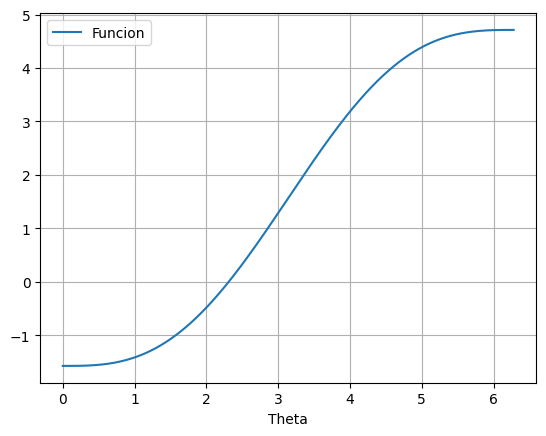

In [ ]:
df.plot.line(x = "Theta", y = "Funcion")
plt.grid()
plt.show()

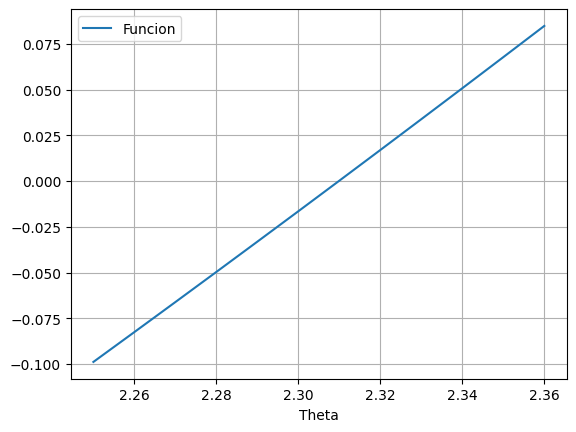

In [ ]:
df_filtro = df[df.Funcion.between(-0.1,0.1)]
df_filtro.plot.line(x ="Theta", y = "Funcion")
plt.grid()
plt.show()

In [ ]:
df_filtro

,Theta,Funcion
225,2.25,-0.098870
226,2.26,-0.082549
227,2.27,-0.066151
228,2.28,-0.049677
229,2.29,-0.033127
230,2.30,-0.016502
231,2.31,0.000198
232,2.32,0.016972
233,2.33,0.033819
234,2.34,0.050739


In [ ]:
raiz = optimize.bisect(theta, 2.30,2.31)
print("La raiz usando el mètodo de Bisecciòn ",raiz)

La raiz usando el mètodo de Bisecciòn  2.3098814600089104


In [ ]:
dtheta = lambda x : 1 - np.cos(x)
raiz = optimize.newton(theta, 2.3,dtheta)
print("La raiz usando el mètodo de Newton ", raiz)

La raiz usando el mètodo de Newton  2.309881460010057


In [ ]:
fixed_theta = lambda x : x - theta(x)
raiz = optimize.fixed_point(fixed_theta,2.30)
print("La raiz usando el mètodo de Punto fijo",raiz )

La raiz usando el mètodo de Punto fijo 2.3098814600100575


In [ ]:
raiz = optimize.newton(theta, 2)
print("La raiz usando el mètodo de secante ", raiz)

La raiz usando el mètodo de secante  2.309881460010033


2.0 An object falling vertically through the air is subjected to viscous resistance as well as to the force
of gravity. Assume that an object with mass m is dropped from a height s0 and that the height of the
object after t seconds is

\begin{equation}
s(t)=s_0 - \frac{mg}{k}t+\frac{m^2g}{k}t(1-e^{-kt/m})
\end{equation}

where $g = 32.17 ft/s2$ and $k$ represents the coefficient of air resistance in $lbs/ft$. Suppose $s0 = 300 ft$,
$m = 0.25$ lb, and $k = 0.1$ lbs/ft. Find, to within $0.01$ s, the time it takes this quarter-pounder to hit the
ground

- Emplee el metodo de biseccion, punto fijo,  newton y secante  para comprobrar la solución.





In [ ]:
g = 32.17
t = 0.01
s0 = 300
m = 0.25
k = 0.1

In [ ]:
s = lambda t: s0 - (((m*g)/k)* t) + (((m**2*g)/k)*t*(1-np.exp((-k*t)/m)))

In [ ]:
t = np.arange(-10,10,0.01)
y = s(t)

In [ ]:
d = {"t": t, "s": y}
df2 = pd.DataFrame(d)

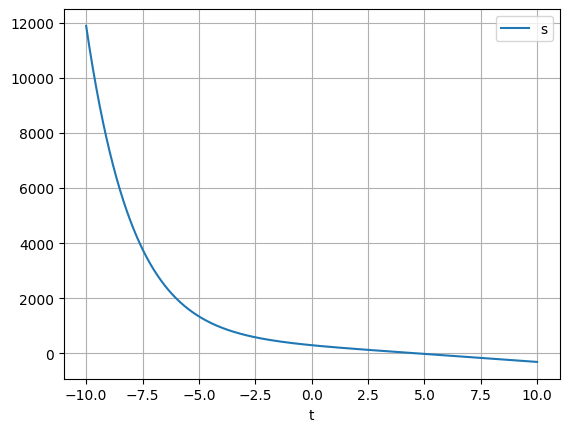

In [ ]:
df2.plot.line(x = "t", y = "s") # Graficar para analizar valores cercanos a la raiz
plt.grid()
plt.show()

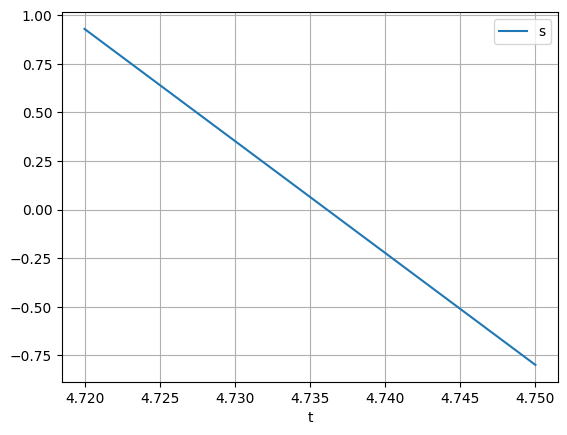

In [ ]:
df2_filtro = df2[df2.s.between(-1,1)] # Permite obtener valores màs cercanos , positivo como el negativo
df2_filtro.plot.line(x ="t", y = "s")
plt.grid()
plt.show()

In [ ]:
raiz = optimize.bisect(s,4.7,4.8)
print("La raiz usando el mètodo de Bisecciòn ",raiz)

La raiz usando el mètodo de Bisecciòn  4.736139137604914


In [ ]:
ds = lambda t : -(m*g)/k + (((m**2*g)/k)*t*(np.exp(-(k*t)/m)*(k/m)))
raiz = optimize.newton(s,4.7,ds)
print("La raiz usando el mètodo de Newton ", raiz)

La raiz usando el mètodo de Newton  4.736139134377808


In [ ]:
fixed_s = lambda t : t - s(t)
raiz = optimize.fixed_point(fixed_s, 4.7)
print("La raiz usando el mètodo de Punto fijo",raiz )

La raiz usando el mètodo de Punto fijo 4.73613913760349


In [ ]:
raiz = optimize.newton(s, 4.7)
print("La raiz usando el mètodo de secante ", raiz)

La raiz usando el mètodo de secante  4.736139137603491


3.0 En la teoria de campo medio, La magnetización como función de la temperatura de un material magnético  puede ser calculada como:

\begin{equation}
m(T) = \tanh\left( \frac{m(T)}{T} \right)
\end{equation}

donde m y T son la magnetizacion y temperatura reducida respectivamente

Para T = 0.5, determine:

a. La magnetización reducida empleando el metodo de la secante(Muestre su resultado con 4 cifras)

b. Valide su respuestado con el metodo de punto fijo.
(Muestre su resultado con 4 cifras)

c. Defina T = np.linspace(0.1,0.99,100), y emple el metodo de la secante para construir un gráfico de magnetización reducida como función de la temperatura para los  100 valores  de T.



5. Construir un fractal empleando el metodo de Newton-Raphson,
(Reproducir código y entender)
\begin{equation}
z_{n+1} = z_n -a \frac{f(z)}{f'(z)}
\end{equation}



\begin{equation}
f'(z) = \frac{ f(z+h)+f(z) }{h}
\end{equation}


Replicar el codigo y entender.


```

import numpy as np
import matplotlib.pylab as plt
from PIL import Image

Npx_X = 80 #Numero de pixeles en x
Npx_Y = 80 #Numero de pixeles en y

image = Image.new("RGB", (Npx_X, Npx_Y)) #Creacion de la imagen inicial

npx = np.arange(0, Npx_X)
npy = np.arange(0, Npx_Y)

xmin = -1
xmax = 1
ymin = -1
ymax = 1
#Transformación al plano complejo en un rectangulo (xmin, xmax), (ymin, ymax)
zx = npx * (xmax - xmin) / (Npx_X - 1)   + xmin
zy = npy * (ymax-ymin) / (Npx_Y - 1) + ymin

#Definicion  la funcion y las derivada
def f(z):
  return z**3 - 1

def fp(z):
  return 3*z**2

h = 1E-4
def fpn(z, h):
  return (f(z+h)-f(z))/h
  

a = 0.2
Niteraciones = 120
eps = 1E-8

x = - 1
for zx_ in zx:
  x = x + 1
  y = -1
  for zy_ in zy:
      y = y + 1
      Z_0 = complex(zx_, zy_)
    
      for i in range(0, Niteraciones):
        Z = Z_0 - a * f(Z_0)/fp(Z_0)

        if( abs(Z-Z_0)<= eps):
          break
          
        Z_0 = Z
      #print(i)
      #print(i)
      r, g, b = i % 4 *64 , i % 8 *16, i% 16* 16
      
      image.putpixel((x,y), (r,g,b) )


plt.imshow(image)
#plt.xlim(400, 600)
#plt.ylim(400, 523)
```


In [2]:
T = 0.5
m_e = lambda m: np.tanh(m / T) - m

In [3]:
m = np.arange(-10,10,0.01)
y = m_e(m)

In [4]:
d2 = {"m": m, "Funcion": y}
df3 = pd.DataFrame(d2)

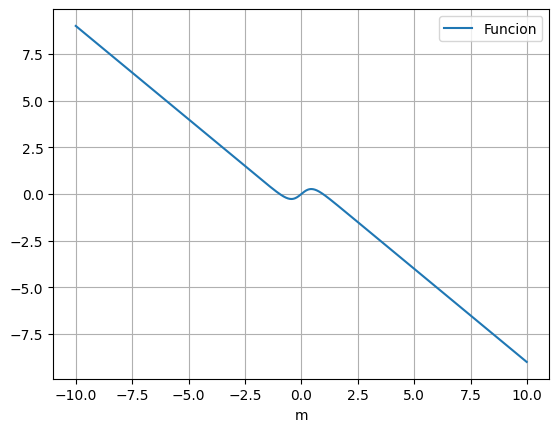

In [5]:
df3.plot.line(x = "m", y = "Funcion")
plt.grid()
plt.show()

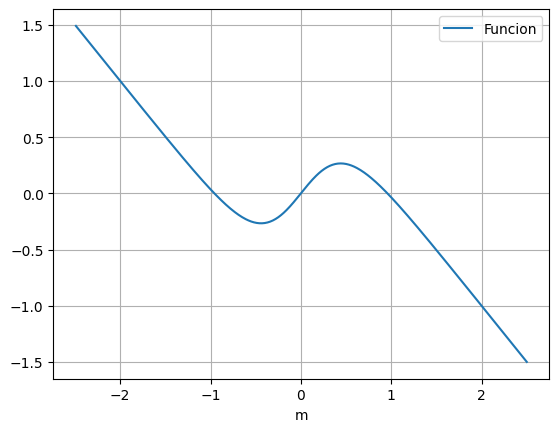

In [8]:
df3_filtro = df3[df3.m.between(-2.5,2.5)]
df3_filtro.plot.line(x = "m", y = "Funcion")
plt.grid()
plt.show()

In [9]:
raiz = optimize.newton(m_e,-1)
print("la raiz usando el metodo de la secante es {:.4f}".format(raiz))

la raiz usando el metodo de la secante es -0.9575


In [16]:
fixed_m = lambda m : m - m_e(m)
raiz = optimize.fixed_point(fixed_m,-1)
print("la raiz usando el metodo del punto fijo es {:.4f}".format(raiz))

la raiz usando el metodo del punto fijo es -0.9575


Punto c

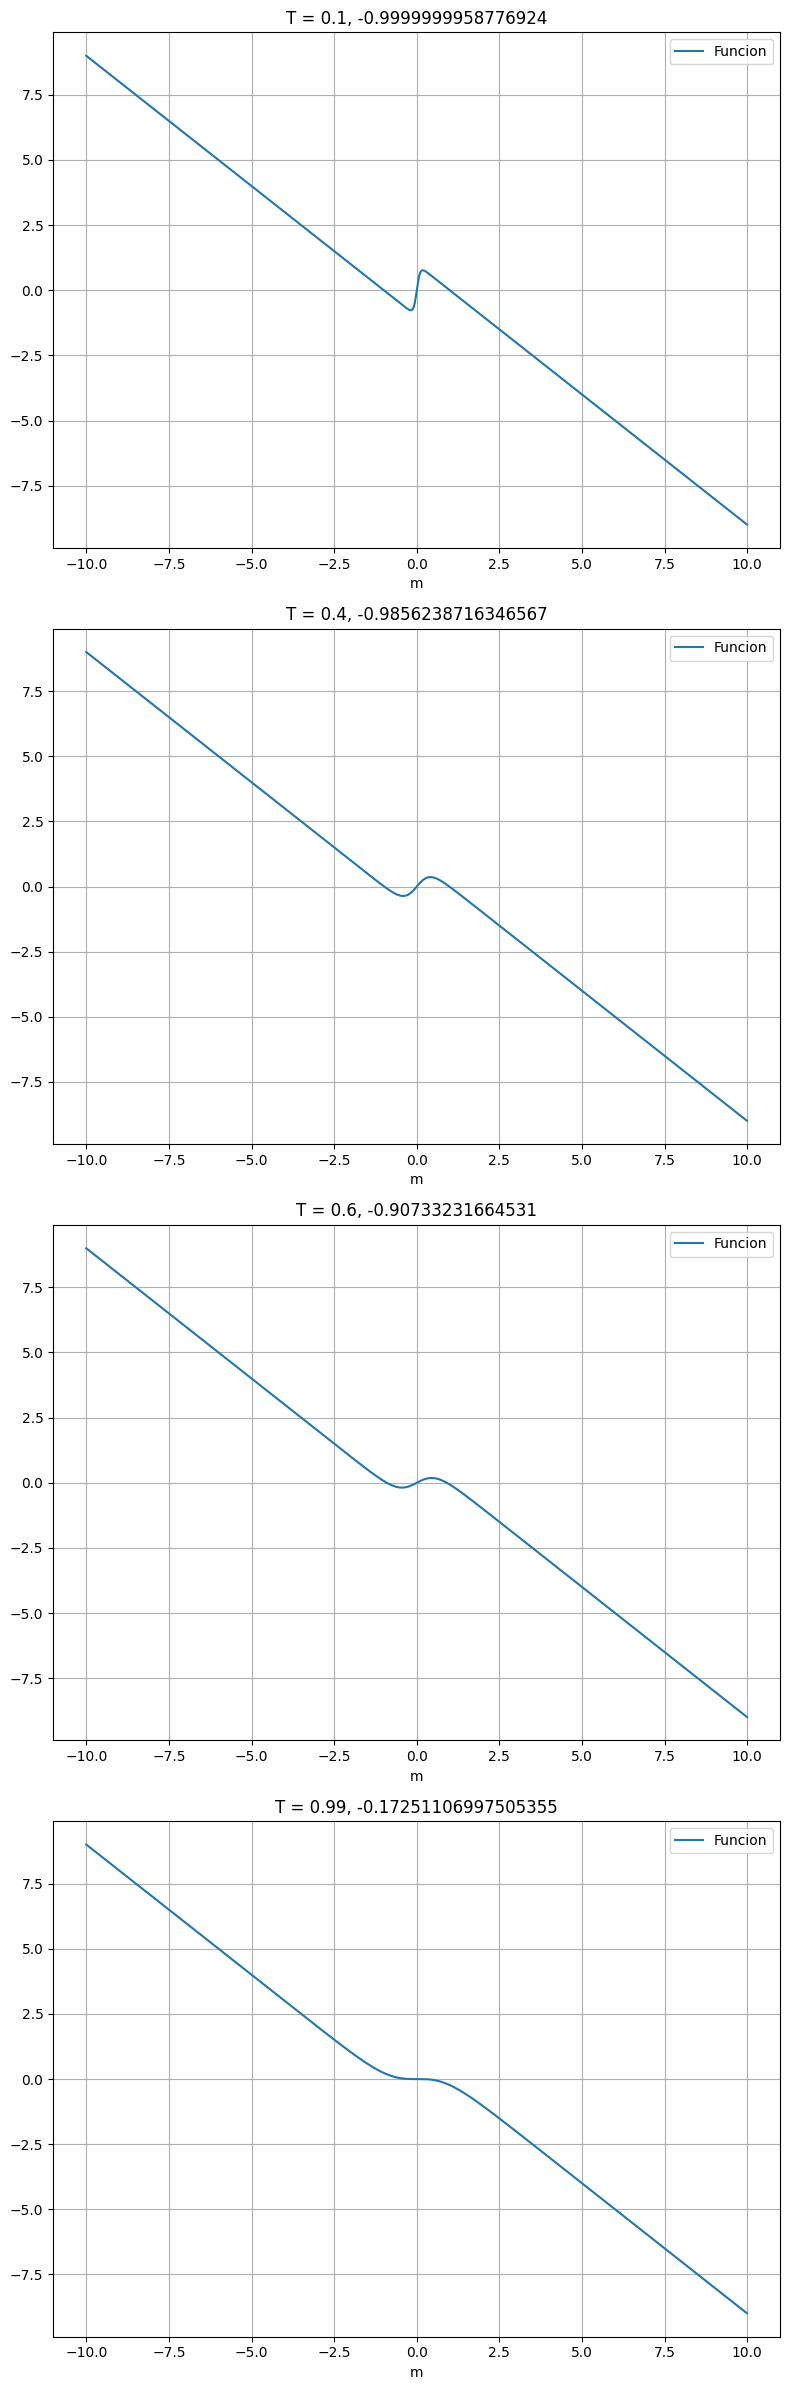

In [79]:
# Aqui voy hacer un primer analisis, para saber como varia la raiz(magnetizacion reducida) en funcion de T
Tl = [0.1,0.4,0.6,0.99]
m = np.arange(-10,10,0.01)
fig, axs = plt.subplots(len(Tl), figsize=(8, 6 * len(Tl)))
for i, T in enumerate(Tl):
    m_e = lambda m: np.tanh(m / T) - m
    m = np.arange(-10, 10, 0.01)
    y = m_e(m)
    d2 = {"m": m, "Funcion": y}
    df3 = pd.DataFrame(d2)
    raiz = optimize.newton(m_e,-1)
    # Graficar en el subgráfico correspondiente
    ax = axs[i]
    df3.plot.line(x="m", y="Funcion", ax=ax)
    ax.grid()
    ax.set_title(f'T = {T}, {raiz}')

plt.tight_layout()
plt.show()

In [81]:
def magnetizacion_reducida(t):  # Magnetizacion reducidad para un valor T
  m_e = lambda m: np.tanh(m / T) - m
  T = t
  raiz = optimize.newton(m_e,-1)
  return raiz

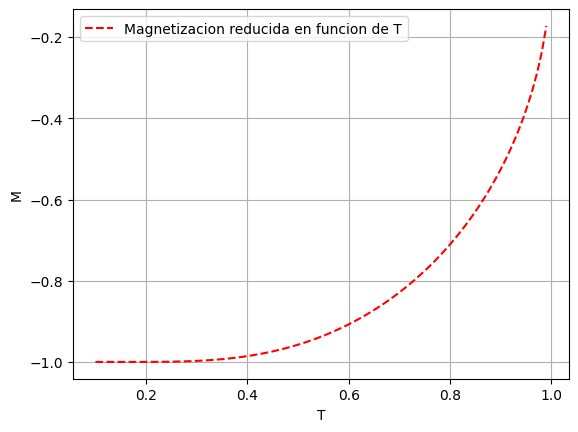

In [88]:
T = np.linspace(0.1,0.99,100)
m_ = []
for t in T:
  mv = magnetizacion_reducida(t)
  m_.append(mv)
plt.plot(T,m_,"r--",label= "Magnetizacion reducida en funcion de T")
plt.grid()
plt.legend()
plt.xlabel("T")
plt.ylabel("M")
plt.show()

Al comparar esta gráfica con el analisis inicial de como varia la magnetizacion reducidad en funcion de T, se concluye que efectivamente la grafica si esta representando correctamente Magnetizacion reducida vs T.

Construir un fractal empleando el metodo de Newton-Raphson, (Reproducir código y entender)

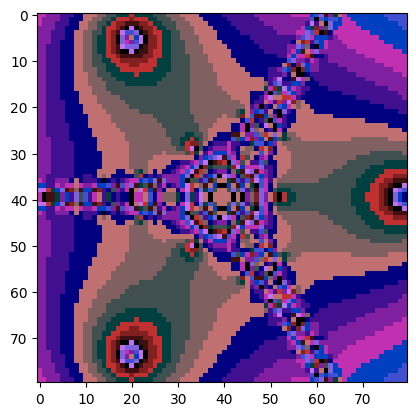

In [95]:
Npx_X = 80 #Numero de pixeles en x
Npx_Y = 80 #Numero de pixeles en y

image = Image.new("RGB", (Npx_X, Npx_Y)) #Creacion de la imagen inicial

npx = np.arange(0, Npx_X)
npy = np.arange(0, Npx_Y)

xmin = -1
xmax = 1
ymin = -1
ymax = 1
#Transformación al plano complejo en un rectangulo (xmin, xmax), (ymin, ymax)
"""Segun lo que busque esto permite estabelecer una correspondencia entre
   los píxeles en la imagen y las coordenadas en el plano complejo,lo que permite calcular
    los valores de la función f(z) en cada punto del rectángulo"""
zx = npx * (xmax - xmin) / (Npx_X - 1)   + xmin
zy = npy * (ymax-ymin) / (Npx_Y - 1) + ymin

# Definicion  la funcion y las derivada

"""La funcion"""
def f(z):
  return z**3 - 1

"""La derivada de funcion"""
def fp(z):
  return 3*z**2

"""Definición de la derivada"""
h = 1E-4
def fpn(z, h):
  return (f(z+h)-f(z))/h


a = 0.2
Niteraciones = 120
eps = 1E-8

x = - 1
"""Se va iterar sobre cada pixel de la imagen donde zx_ y zy_ representan las coordenades en plano complejo
que en este caso, estan asociadas al pixel"""
for zx_ in zx:
  x = x + 1
  y = -1
  for zy_ in zy:
      y = y + 1
    """Inicializa un punto complejo con las coordenas del pixel actual, es necesario para el metodo de Newton"""
      Z_0 = complex(zx_, zy_)
    """Esto es el metodo de Newton de forma iterada, su formula."""
      for i in range(0, Niteraciones):
        Z = Z_0 - a * f(Z_0)/fp(Z_0)
    """Es decir se va a iterar hasta que se cumpla la condicion o se hayan realizado el maximo de iteraciones"""
        if( abs(Z-Z_0)<= eps):
          break

        Z_0 = Z
      #print(i)
      #print(i)
"""Primero determina el color para el pixel, dependiendo de i, es decir el numero de iteracciones
que tomo para converger.Luego, se asigna el color determinado al píxel correspondiente a la imagen"""
      r, g, b = i % 4 *64 , i % 8 *16, i% 16* 16
      image.putpixel((x,y), (r,g,b) )


plt.imshow(image)
#plt.xlim(400, 600)
#plt.ylim(400, 523)